# Dataset Overview


The dataset includes detailed information on customer transactions, capturing key attributes such as user ID, customer name, product ID, gender, age group, marital status, state, zone, occupation, product category, number of orders, and total amount spent. This comprehensive dataset enables in-depth analysis of sales patterns, customer demographics, and product performance during the Diwali season. By examining these attributes, businesses can gain insights into customer behavior, optimize inventory management, and enhance targeted marketing strategies.

# Objectives 

- Analyze sales data to understand customer preferences and behavior for improved service and personalization.
- Identify high-performing products, categories, and customer segments to drive targeted sales strategies and promotions.
- Use insights from sales patterns to manage stock levels effectively, reducing overstocking and understocking.
- Leverage demographic and geographic insights to tailor marketing efforts and promotions for maximum impact.
- Provide actionable insights for better decision-making in areas such as product offerings, regional focus, and customer engagement.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [2]:

df = pd.read_csv(r"C:\Users\Hp\Downloads\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv", encoding='latin1')
                                                                                           # encoding --use for avoid errors

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.shape

(11251, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [7]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
# drop null values
df.dropna(inplace=True)           # inplace=True  ------------prermenently change karta h and save karta h

In [9]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [10]:
df['Amount'].dtypes

dtype('int32')

In [11]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [12]:
#rename column
df.rename(columns= {'Marital_Status':'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [13]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [14]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender

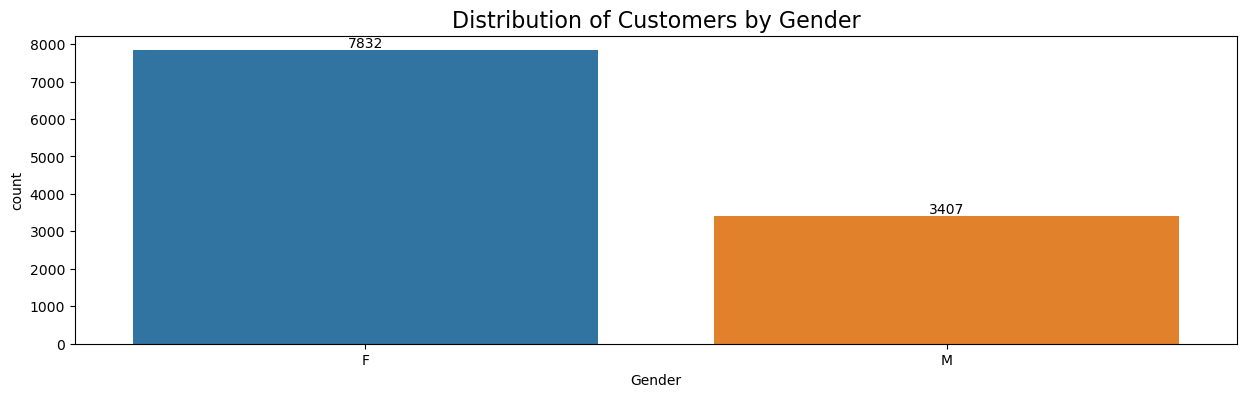

In [15]:
# plotting a bar chart for Gender and it's count
plt.figure(figsize=(15, 4))
ax = sns.countplot(x = 'Gender',data = df)
plt.title('Distribution of Customers by Gender', fontsize=16)

for bars in ax.containers:   #---------------for above bar , showing value
    ax.bar_label(bars)

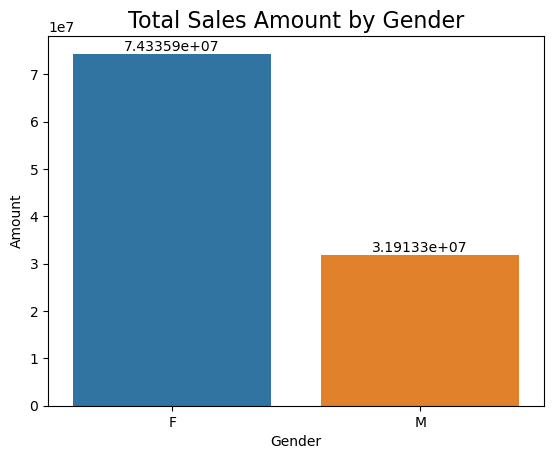

In [16]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
ax = sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)
plt.title('Total Sales Amount by Gender', fontsize=16)


for bars in ax.containers:
    ax.bar_label(bars)

- *From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### Age

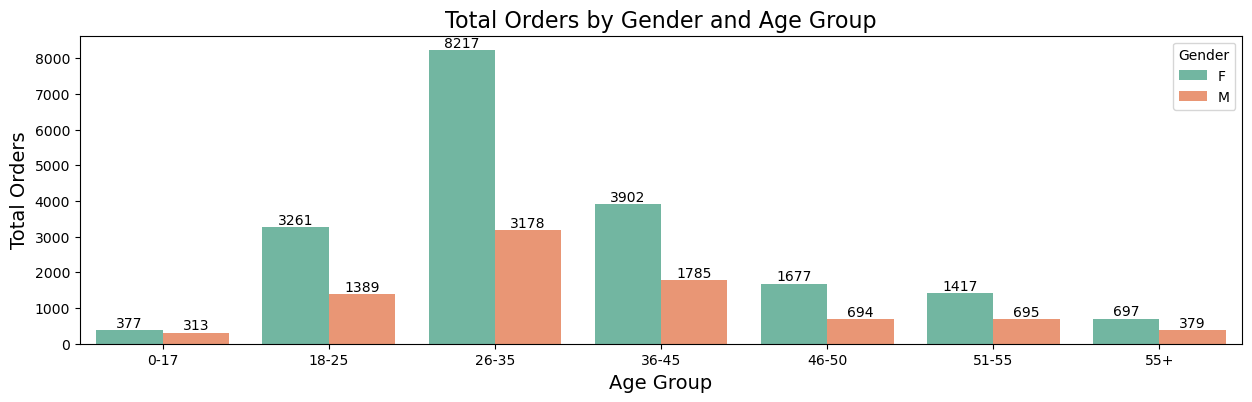

In [17]:
orders_gender_age = df.groupby(['Gender', 'Age Group'], as_index=False)['Orders'].sum()

plt.figure(figsize=(15, 4))
ax = sns.barplot(data=orders_gender_age, x='Age Group', y='Orders', hue='Gender', palette='Set2')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Total Orders by Gender and Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Total Orders', fontsize=14)
plt.legend(title='Gender')
plt.show()


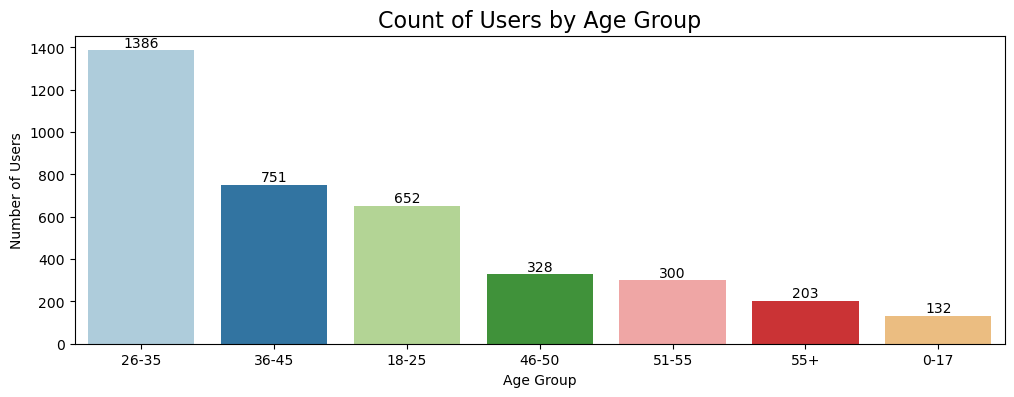

In [18]:
users_age_group = df.groupby('Age Group')['User_ID'].nunique().reset_index().sort_values(by='User_ID', ascending=False)

plt.figure(figsize=(12, 4))
ax = sns.barplot(data=users_age_group, x='Age Group', y='User_ID', palette='Paired')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Count of Users by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=10)
plt.ylabel('Number of Users', fontsize=10)
plt.show()


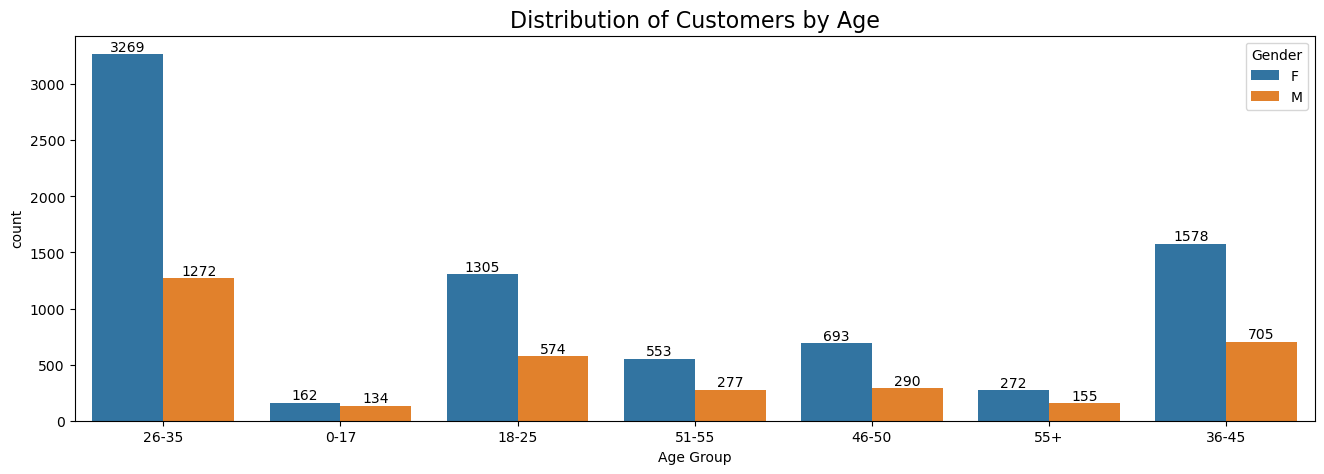

In [19]:
plt.figure(figsize=(16, 5))
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')
plt.title('Distribution of Customers by Age', fontsize=16)

for bars in ax.containers:
    ax.bar_label(bars)

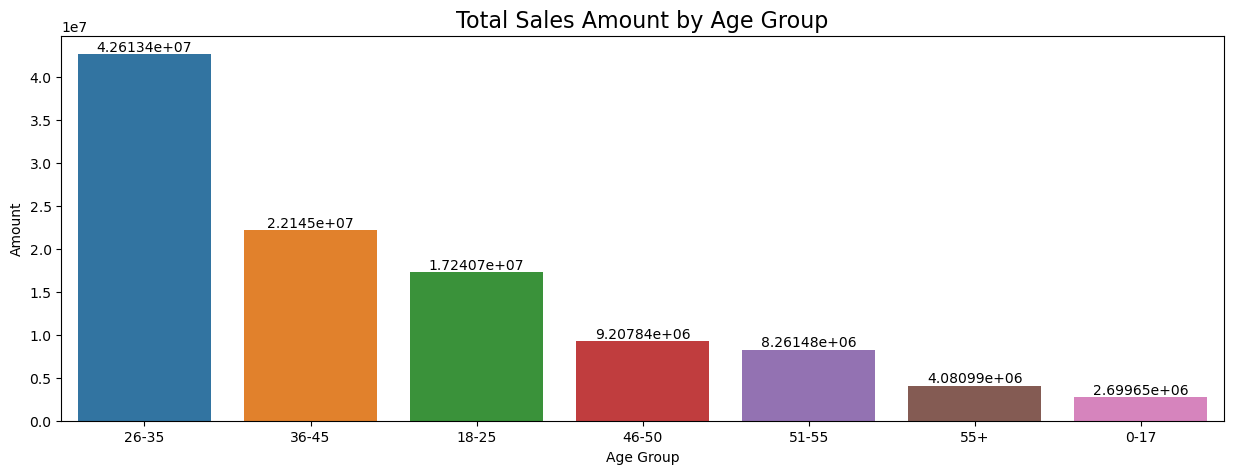

In [20]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(15, 5))
ax=sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)
plt.title('Total Sales Amount by Age Group', fontsize=16)

for bars in ax.containers:
    ax.bar_label(bars)

- *From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

### State

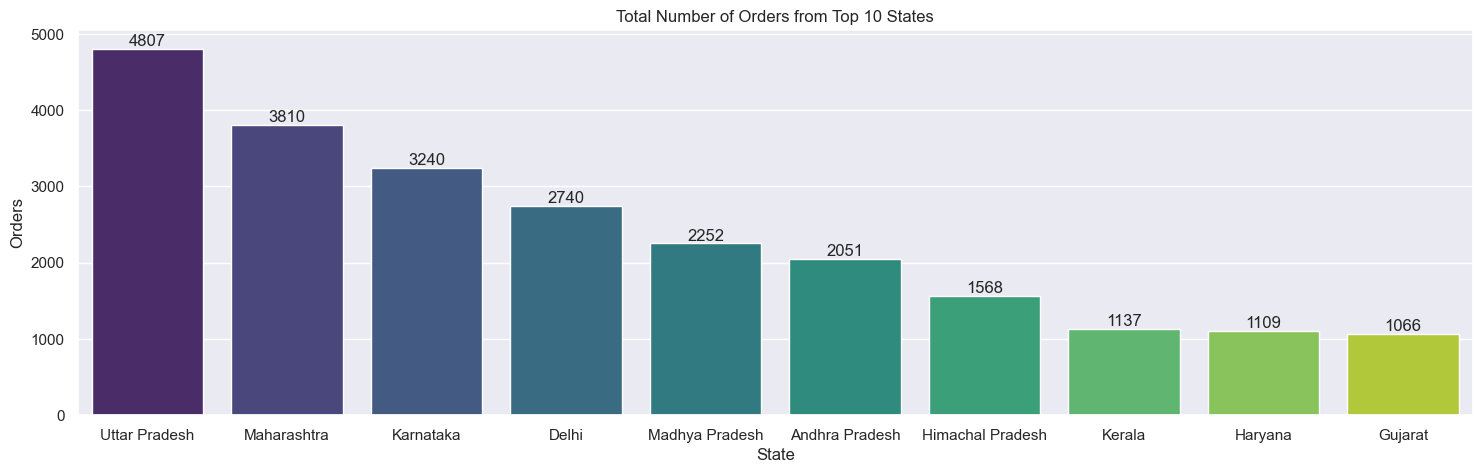

In [21]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(18,5)})
ax=sns.barplot(data = sales_state, x = 'State',y= 'Orders', palette='viridis')
plt.title('Total Number of Orders from Top 10 States')


for bars in ax.containers:
    ax.bar_label(bars)

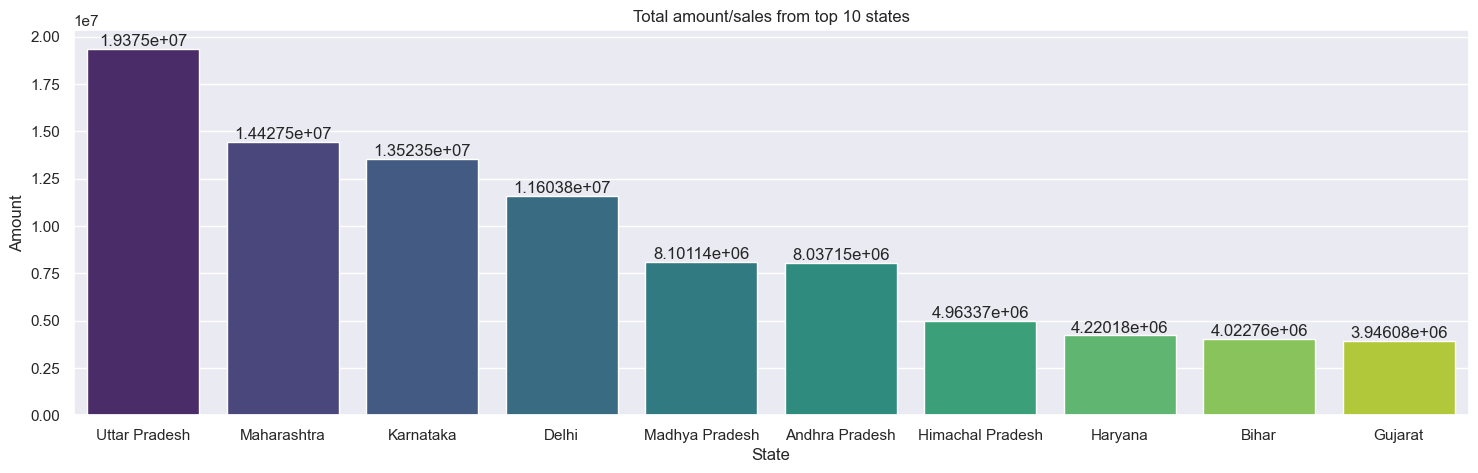

In [22]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(18,5)})
ax=sns.barplot(data = sales_state, x = 'State',y= 'Amount', palette='viridis')
plt.title('Total amount/sales from top 10 states')


for bars in ax.containers:
    ax.bar_label(bars)

- *From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### Marital Status

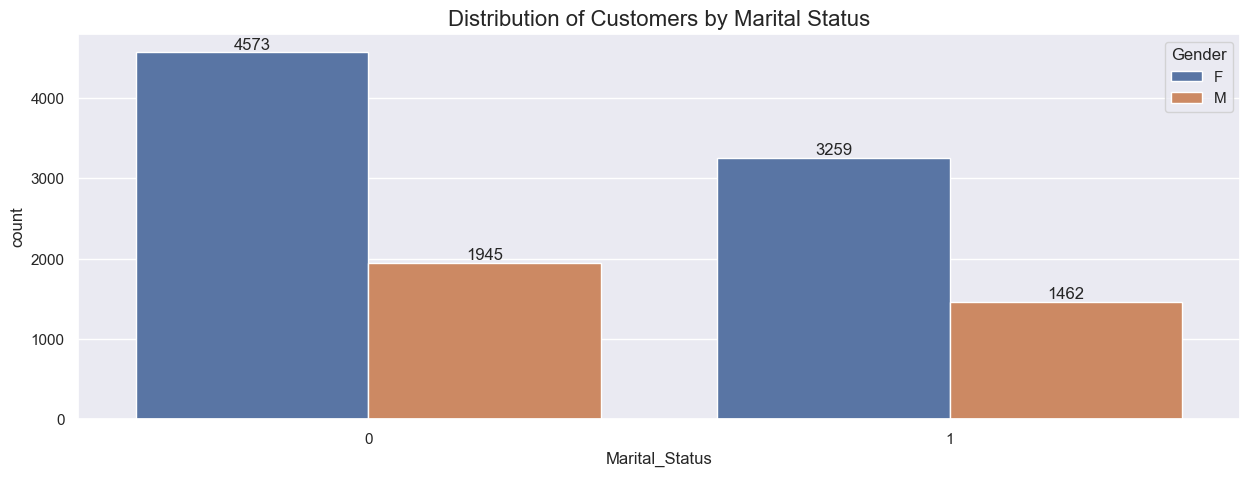

In [23]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.countplot(data = df, x = 'Marital_Status',hue='Gender')
plt.title('Distribution of Customers by Marital Status', fontsize=16)


for bars in ax.containers:
    ax.bar_label(bars)

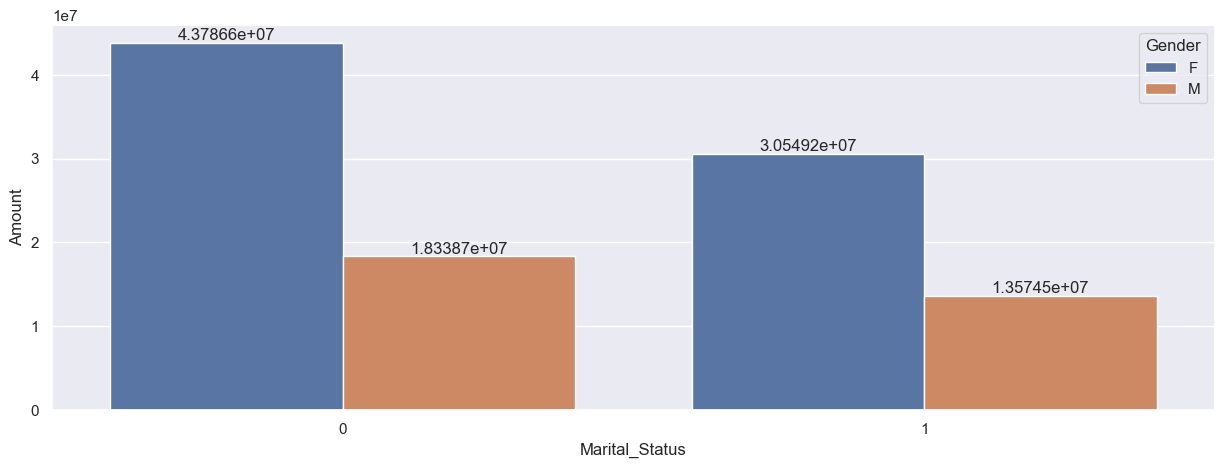

In [24]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(15,5)})
ax=sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

- *From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

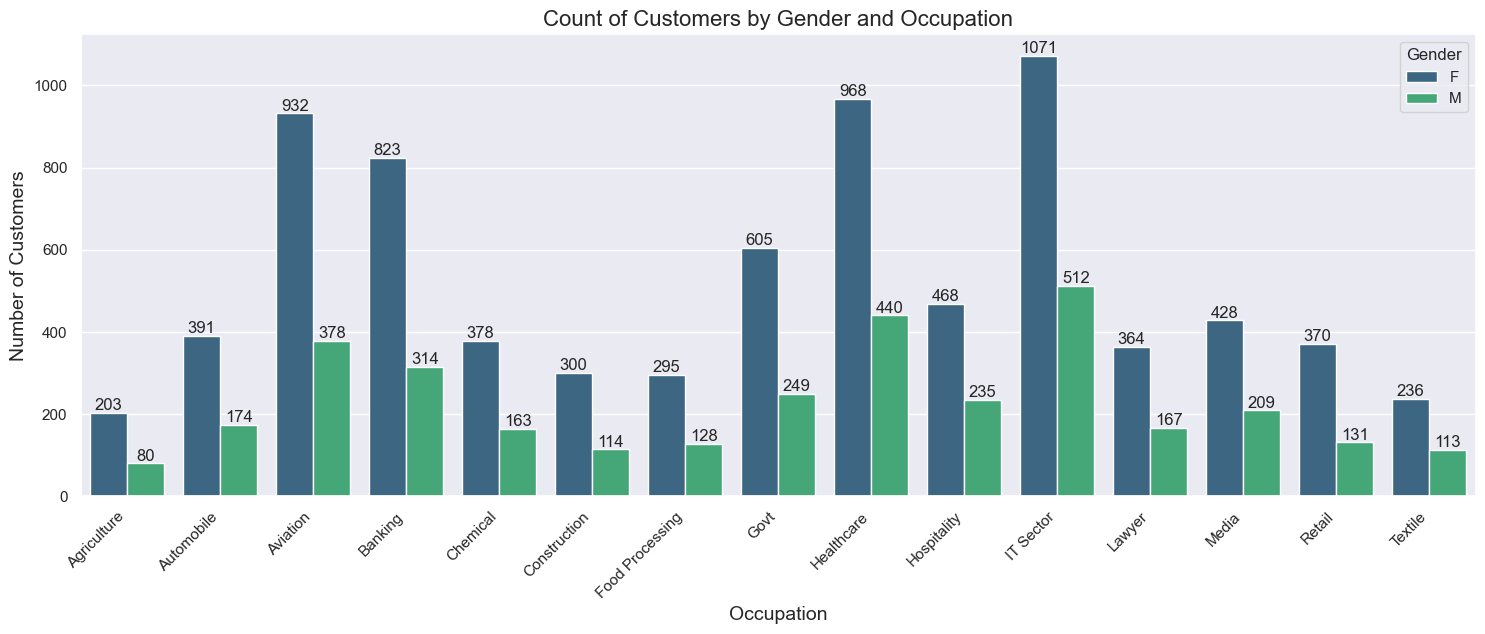

In [25]:
customer_gender_occupation = df.groupby(['Gender', 'Occupation'], as_index=False)['User_ID'].count()

plt.figure(figsize=(18, 6))
ax = sns.barplot(data=customer_gender_occupation, x='Occupation', y='User_ID', hue='Gender', palette='viridis')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Count of Customers by Gender and Occupation', fontsize=16)
plt.xlabel('Occupation', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.show()


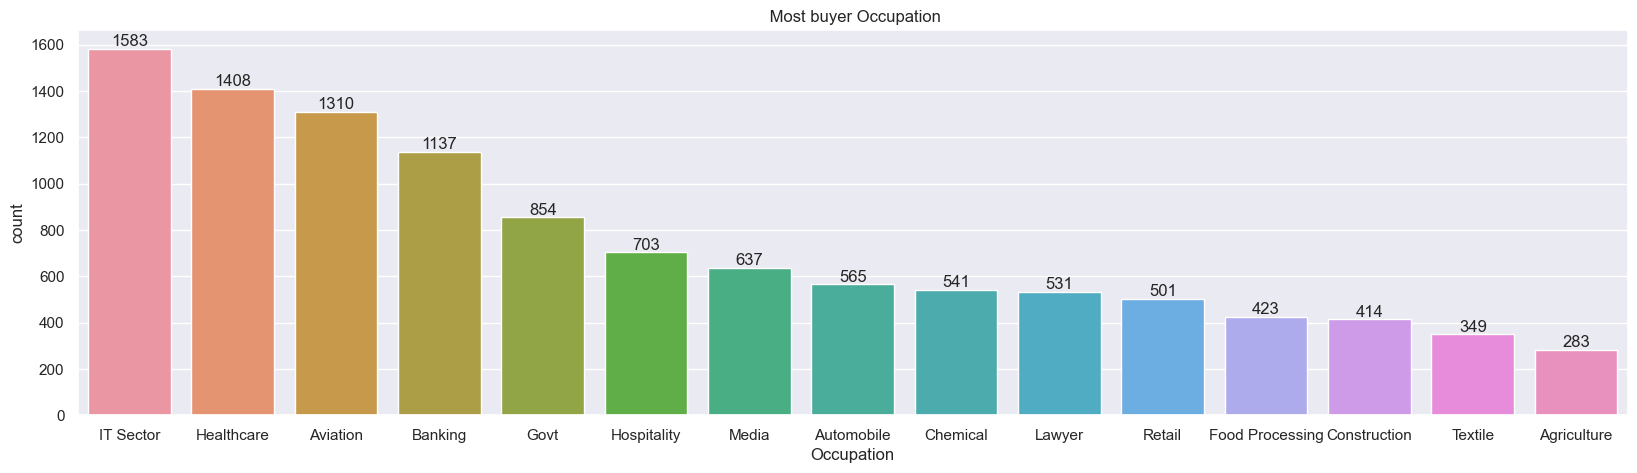

In [26]:
sns.set(rc={'figure.figsize':(20,5)})

ax = sns.countplot(data=df, x='Occupation', order=df['Occupation'].value_counts().index)   #---descending value

for bars in ax.containers:
    ax.bar_label(bars)

ax.set_title(' Most buyer Occupation')

plt.show()


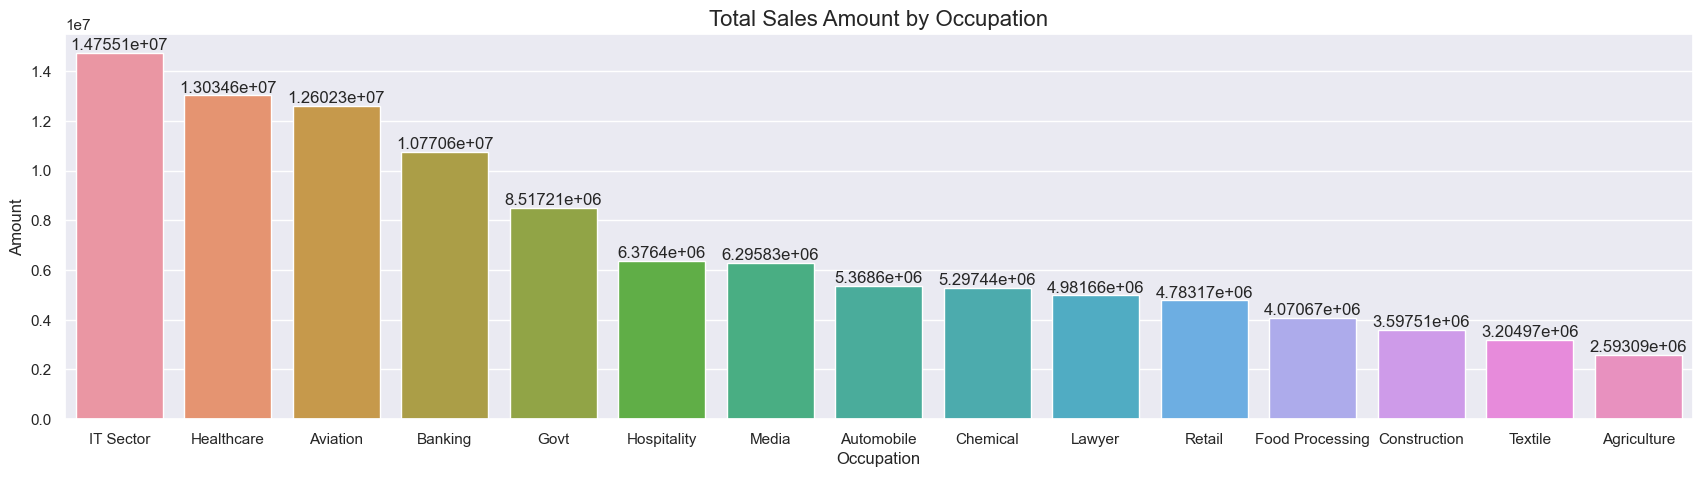

In [27]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(21,5)})
ax=sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')
plt.title('Total Sales Amount by Occupation', fontsize=16)

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()


- *From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

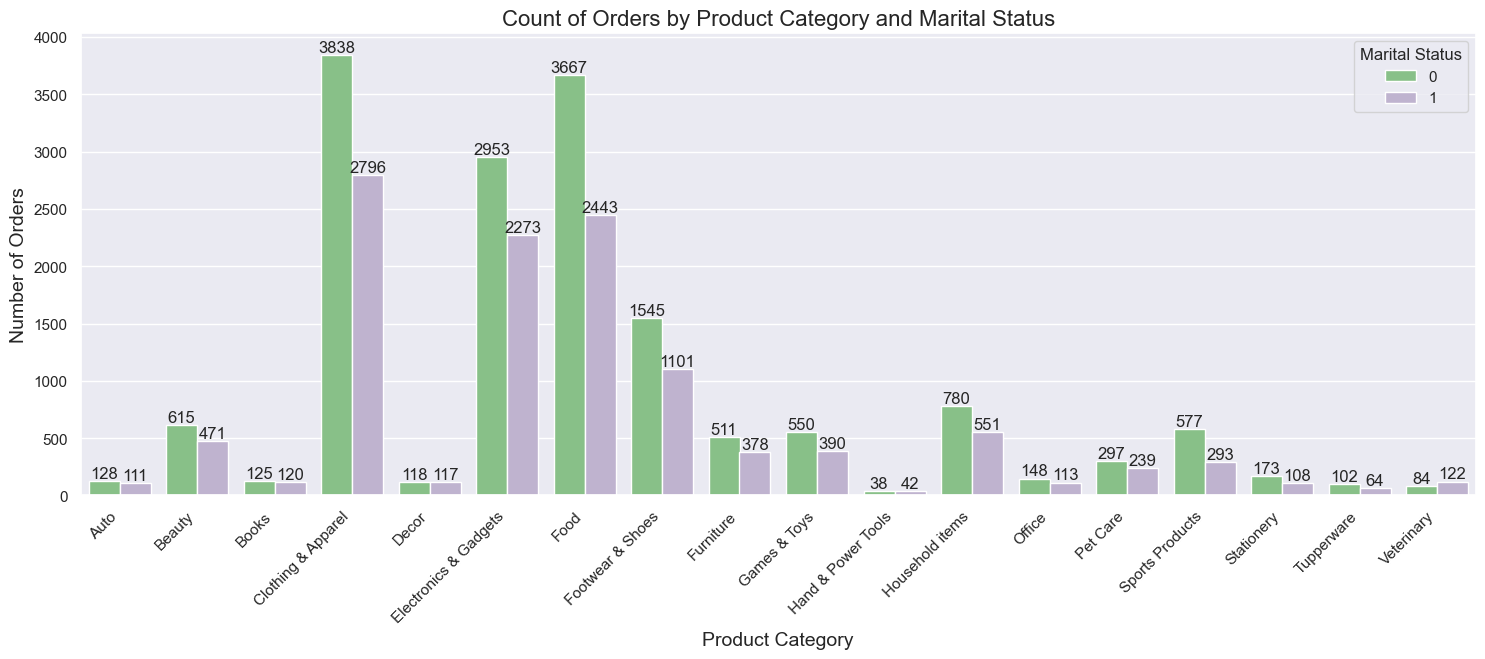

In [28]:
orders_category_marital = df.groupby(['Product_Category', 'Marital_Status'], as_index=False)['Orders'].sum()

plt.figure(figsize=(18, 6))
ax = sns.barplot(data=orders_category_marital, x='Product_Category', y='Orders', hue='Marital_Status', palette='Accent')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Count of Orders by Product Category and Marital Status', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Marital Status')
plt.show()


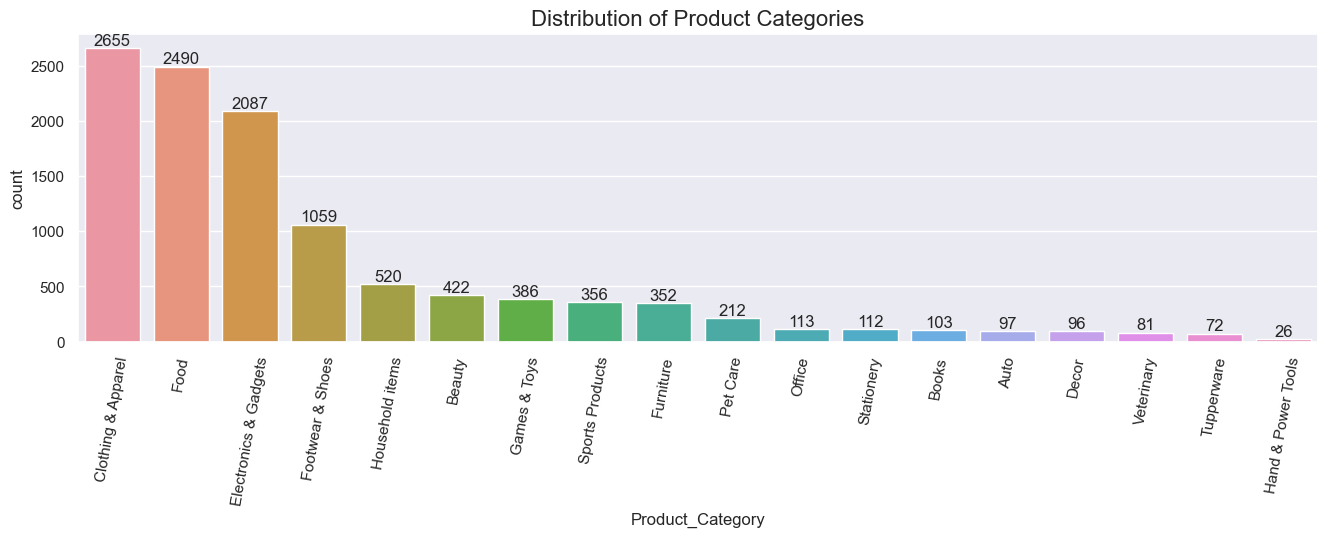

In [29]:
sns.set(rc={'figure.figsize':(16,4)})
ax = sns.countplot(data = df, x = 'Product_Category', order=df['Product_Category'].value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Distribution of Product Categories', fontsize=16)
plt.xticks(rotation=80)
plt.show()

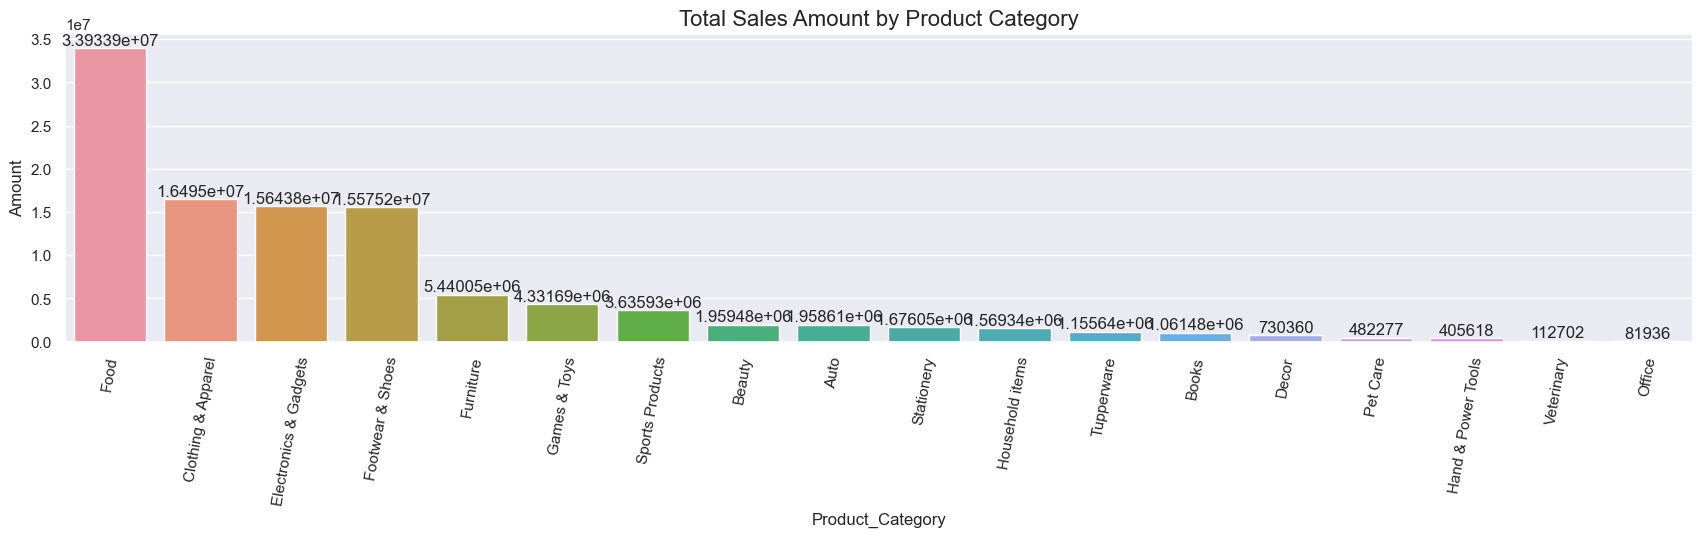

In [30]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(21,4)})
ax = sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')


for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Total Sales Amount by Product Category', fontsize=16)
plt.xticks(rotation=80)
plt.show()

- *From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

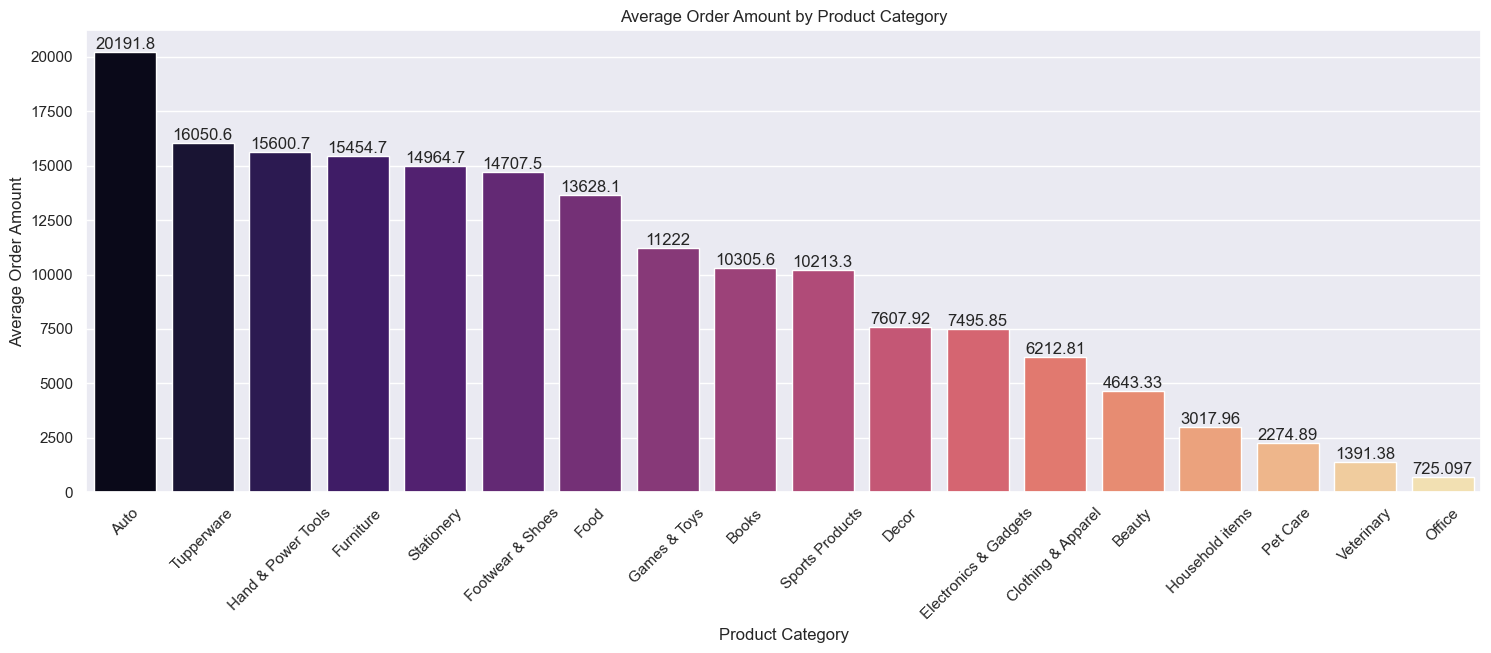

In [31]:
plt.figure(figsize=(18, 6))
avg_order_amount = df.groupby('Product_Category', as_index=False)['Amount'].mean().sort_values(by='Amount', ascending=False)
ax=sns.barplot(data=avg_order_amount, x='Product_Category', y='Amount', palette='magma')


for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title('Average Order Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Order Amount')
plt.xticks(rotation=45)
plt.show()


- *From above graph, we can see that the highest average order amounts are observed in  the Product Categories of Auto, Tupperware, and Hand & Power Tools, indicating these categories generate significant revenue per order.*

# Product_ID

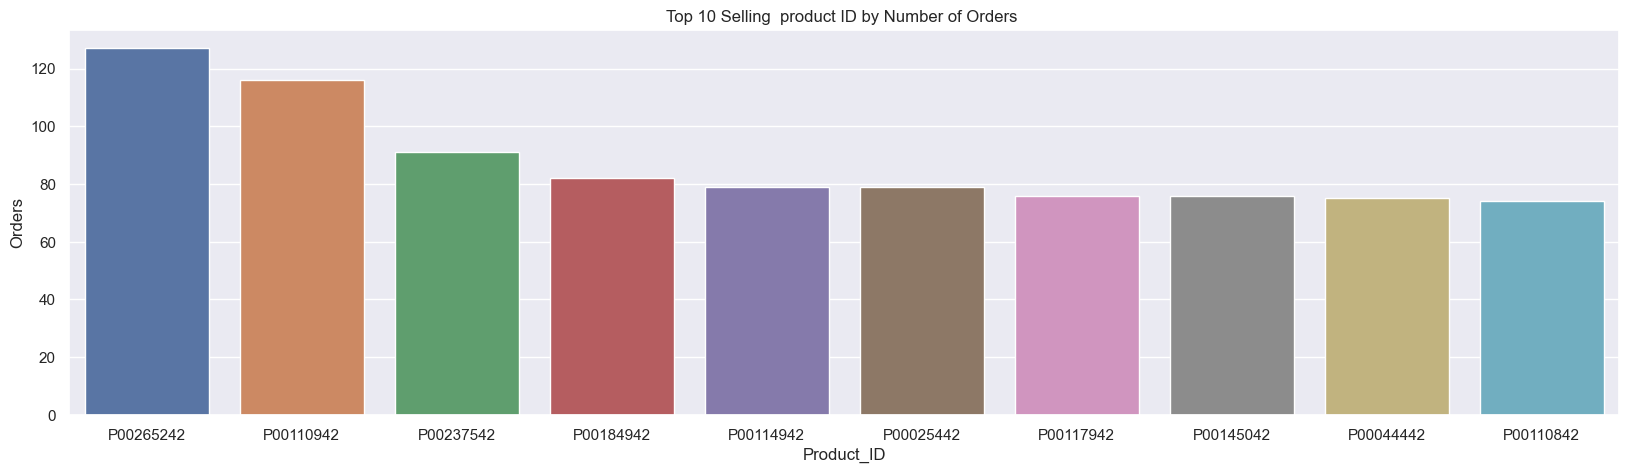

In [32]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

plt.title('Top 10 Selling  product ID by Number of Orders ')
plt.show()

# Zone

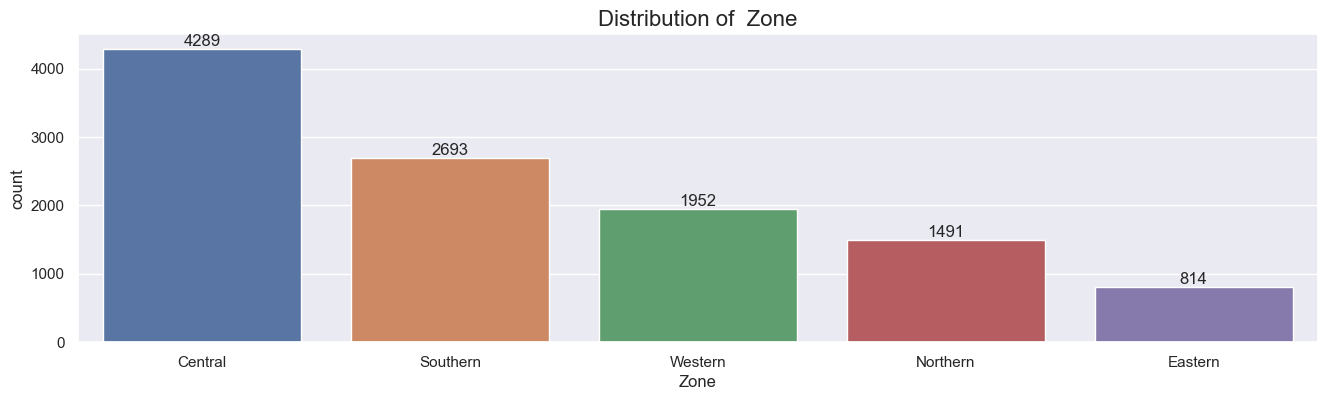

In [33]:
sns.set(rc={'figure.figsize':(16,4)})
ax = sns.countplot(data = df, x = 'Zone', order=df['Zone'].value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Distribution of  Zone', fontsize=16)
plt.show()

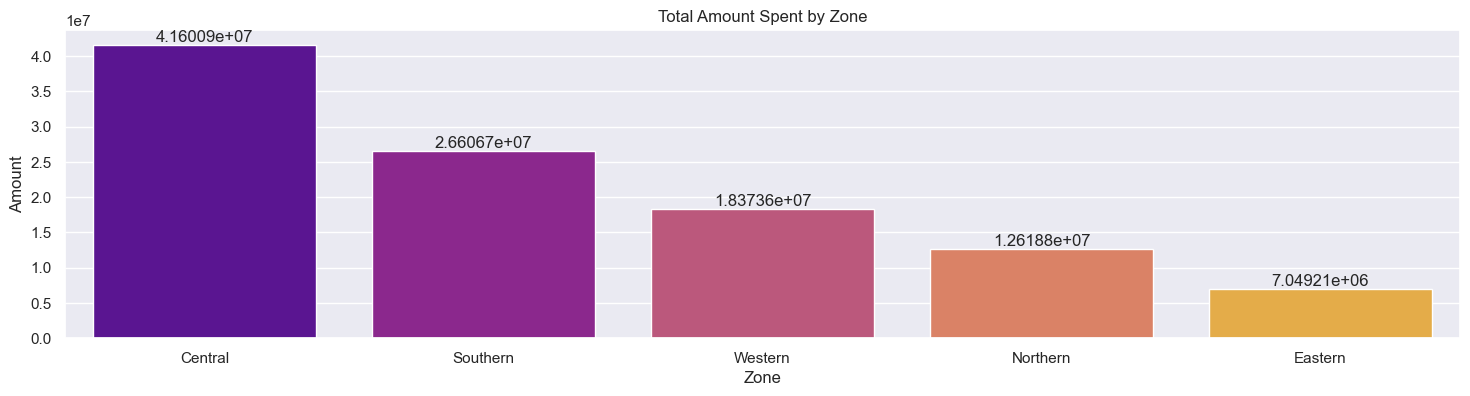

In [34]:
plt.figure(figsize=(18, 4))
zone_sales = df.groupby('Zone', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
ax = sns.barplot(data=zone_sales, x='Zone', y='Amount', palette='plasma')

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title('Total Amount Spent by Zone')
plt.show()


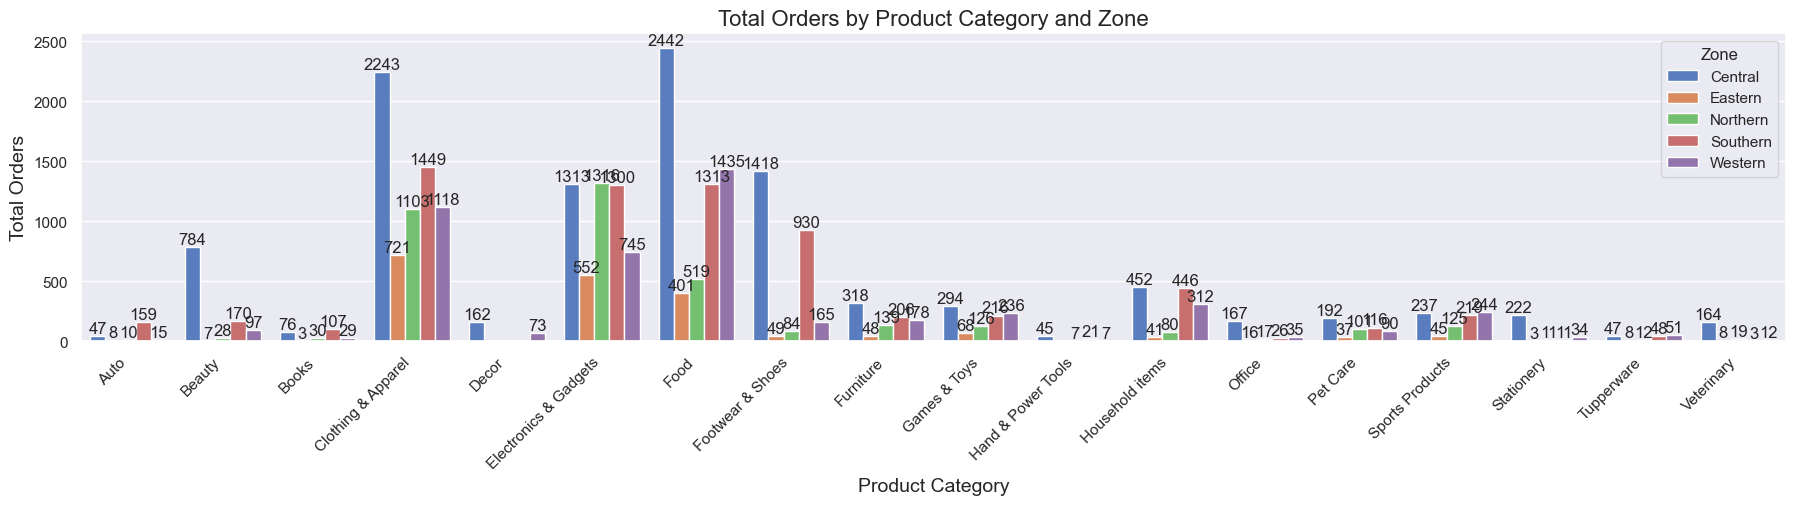

In [35]:
orders_category_zone = df.groupby(['Product_Category', 'Zone'], as_index=False)['Orders'].sum()

plt.figure(figsize=(22, 4))
ax = sns.barplot(data=orders_category_zone, x='Product_Category', y='Orders', hue='Zone', palette='muted')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Total Orders by Product Category and Zone', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Orders', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Zone')
plt.show()


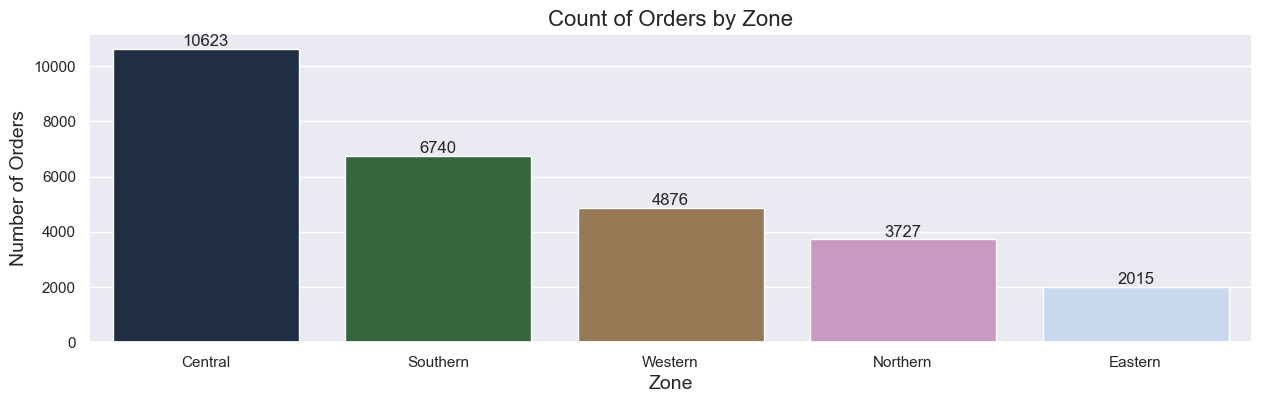

In [36]:
orders_zone = df.groupby('Zone', as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)

plt.figure(figsize=(15, 4))
ax = sns.barplot(data=orders_zone, x='Zone', y='Orders', palette='cubehelix')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Count of Orders by Zone', fontsize=16)
plt.xlabel('Zone', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.show()


- *From above graphs we can see that Central Zone has spent more amount for shopping and Order count more than 10 thousand*

# Conclusion:

- *Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*
- *The Diwali sales data analysis project provides valuable insights into customer behavior, product performance, and regional sales trends. These learnings can be leveraged to enhance marketing strategies, optimize inventory management, and improve overall customer experience, ultimately driving increased revenue and business growth.*

## Project Learnings

- Performed data cleaning and manipulation
- Performed exploratory data analysis (EDA) using pandas, matplotlib and seaborn libraries
- Improved customer experience by identifying potential customers across different states, occupation, gender and age groups
- Improved sales by identifying most selling product categories and products, which can help to plan inventory and hence meet the demands
- Identified the gender distribution of customers and the corresponding sales amounts. This helps in understanding which gender segment is more engaged and contributes more to sales.
- Identified top-selling products and popular categories help optimize inventory and focus marketing efforts on high-demand items.
-  Analysis of sales amounts and order counts highlights customer engagement levels and identifies potential areas for growth.

# Thank you!